In [1]:
# The code was removed by Watson Studio for sharing.

In [2]:
# The code was removed by Watson Studio for sharing.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
##following cells will give simple analysis of data##
data.columns #list of column headers

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
#count of each row in data
data.count()

show_id         6234
type            6234
title           6234
director        4265
cast            5664
country         5758
date_added      6223
release_year    6234
rating          6224
duration        6234
listed_in       6234
description     6234
dtype: int64

In [5]:
#checking for null values
data.apply(lambda x: sum(x.isnull()),axis=0)

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
#for analyzing runtime
mov=data.query("type=='Movie'")
mov['min']=mov['duration'].str.split(' ',expand=True)[0]
mov['min']=mov['min'].astype(int)
mov['hr']=mov['min']/60

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

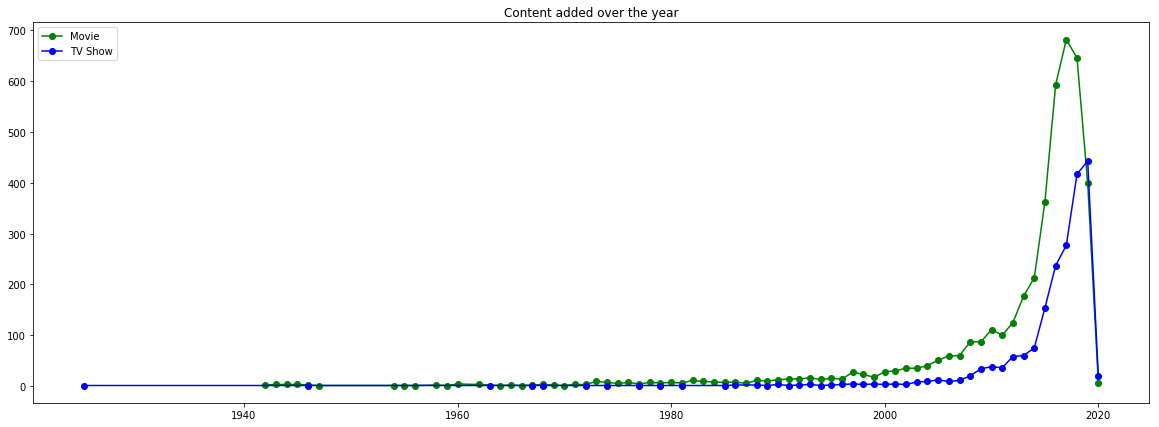

In [7]:
#growth in content over years
plt.figure(figsize=(20, 7))
#Convert groupby into Dataframe
group = pd.DataFrame({'count' : data.groupby( [ "type", "release_year"] ).size()}).reset_index()
#Calcute percent
group['percent'] = group['count'].apply(lambda x: (x*100)/sum(group['count']))

#plot for movie
plt.plot(group[group['type']=='Movie']['release_year'],group[group['type']=='Movie']['count'],linestyle='-', marker='o', color='green', label="Movie")

#plot for TV Show
plt.plot(group[group['type']=='TV Show']['release_year'],group[group['type']=='TV Show']['count'], linestyle='-', marker='o',color='blue', label = "TV Show")
plt.title('Content added over the year')
plt.legend()

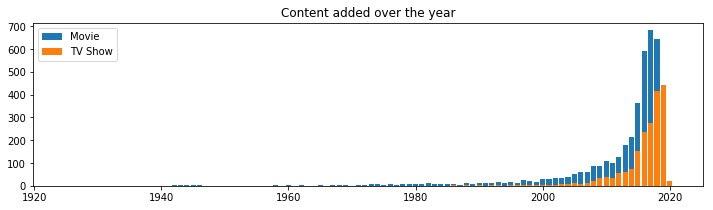

In [8]:
#Original Release Year of the movies
plt.figure(figsize=(12, 3))
#Convert groupby into Dataframe
group = pd.DataFrame({'count' : data.groupby( [ "type", "release_year"] ).size()}).reset_index()
#Calcute percent
group['percent'] = group['count'].apply(lambda x: (x*100)/sum(group['count']))

#plot for movie
plt.bar(group[group['type']=='Movie']['release_year'],group[group['type']=='Movie']['count'], label="Movie")

#plot for TV Show
plt.bar(group[group['type']=='TV Show']['release_year'],group[group['type']=='TV Show']['count'], label = "TV Show")
plt.title('Content added over the year')
plt.legend()

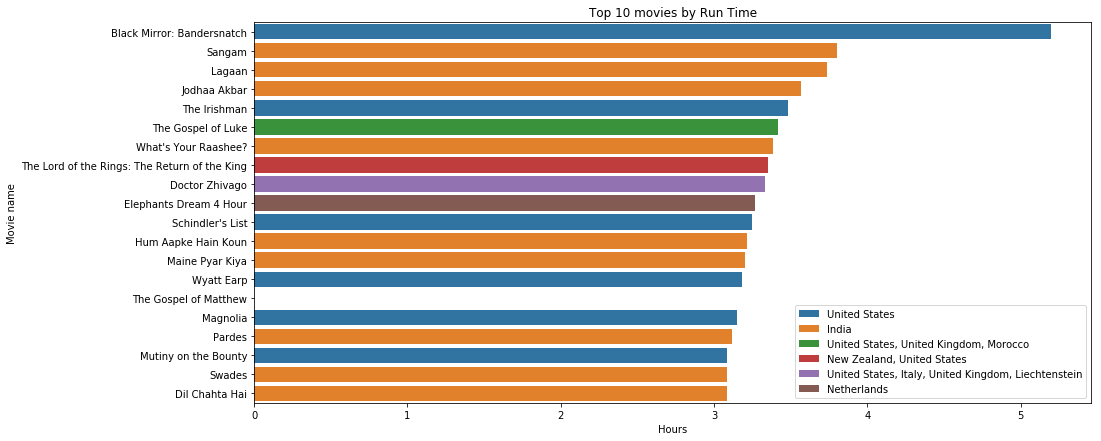

In [9]:
#top movies runtime
top20run=mov.sort_values(by='hr',ascending=False).head(20)
plt.figure(figsize=(15,7))
sns.barplot(data=top20run,y='title',x='hr',hue='country',dodge=False)
plt.legend(loc='lower right')
plt.title('Top 10 movies by Run Time')
plt.xlabel('Hours')
plt.ylabel('Movie name')
plt.show()

In [10]:
#for getting top tv shows based on number of seasons
tv=data.query("type=='TV Show'")
tv['sea']=tv['duration'].str.split(' ',expand=True)[0]
tv['sea']=tv['sea'].astype(int)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


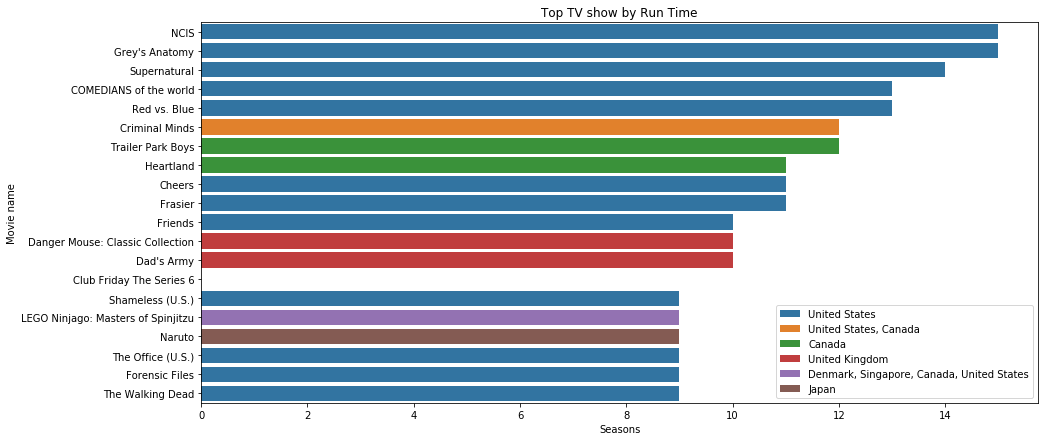

In [11]:
#top tv shows by num of seasons
top20tv=tv.sort_values(by='sea',ascending=False).head(20)
plt.figure(figsize=(15,7))
sns.barplot(data=top20tv,y='title',x='sea',hue='country',dodge=False)
plt.legend(loc='lower right')
plt.title('Top TV show by Run Time')
plt.xlabel('Seasons')
plt.ylabel('Movie name')
plt.show()


In [12]:
!pip install cufflinks #wrapper I installed to get additional visualization analysis

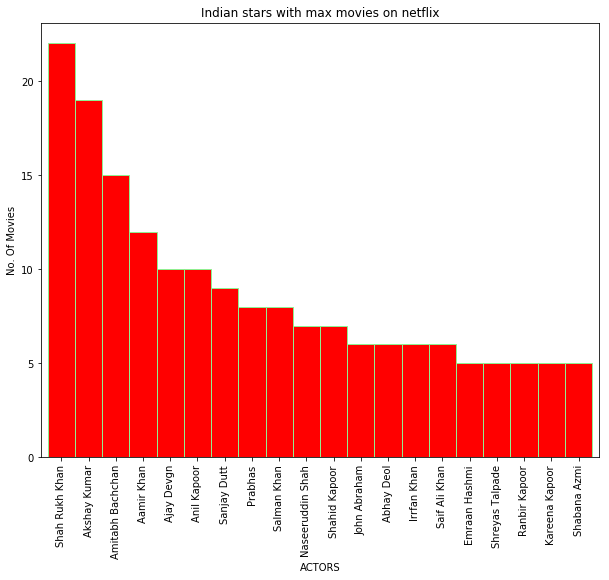

In [13]:
#Indian movie stars with most movies
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
indcast=[]
ind=data.query('country=="India"')
for i in ind['cast']:
    indcast.append(i)
newls=[]
for i in indcast:
    newls.append(str(i).split(',')[0])
inddf=pd.DataFrame(newls,columns=['name'])
ind_df=inddf.drop(inddf.query('name=="nan"').index)
ind_df['name'].value_counts().head(20).plot(kind="bar",width=1,color='red',edgecolor='lightgreen',figsize=(10,8))
plt.xlabel("ACTORS")
plt.ylabel("No. Of Movies")
plt.title("Indian stars with max movies on netflix")
plt.show()

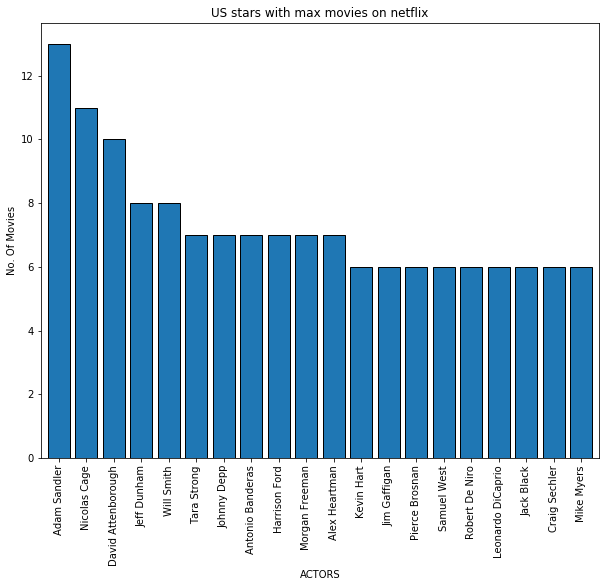

In [14]:
#US movie stars with most movies.
us=data[data['country'].str.contains('United States',na=False)]
uscast=[]
for i in us['cast']:
    uscast.append(i)
newls1=[]
for i in uscast:
    newls1.append(str(i).split(',')[0])
    
usdf=pd.DataFrame(newls1,columns=['name'])
us_df=usdf.drop(usdf.query('name=="nan"').index)
us_df['name'].value_counts().head(20).plot(kind="bar",width=.8,edgecolor='black',figsize=(10,8))
plt.xlabel("ACTORS")
plt.ylabel("No. Of Movies")
plt.title("US stars with max movies on netflix")
plt.show()

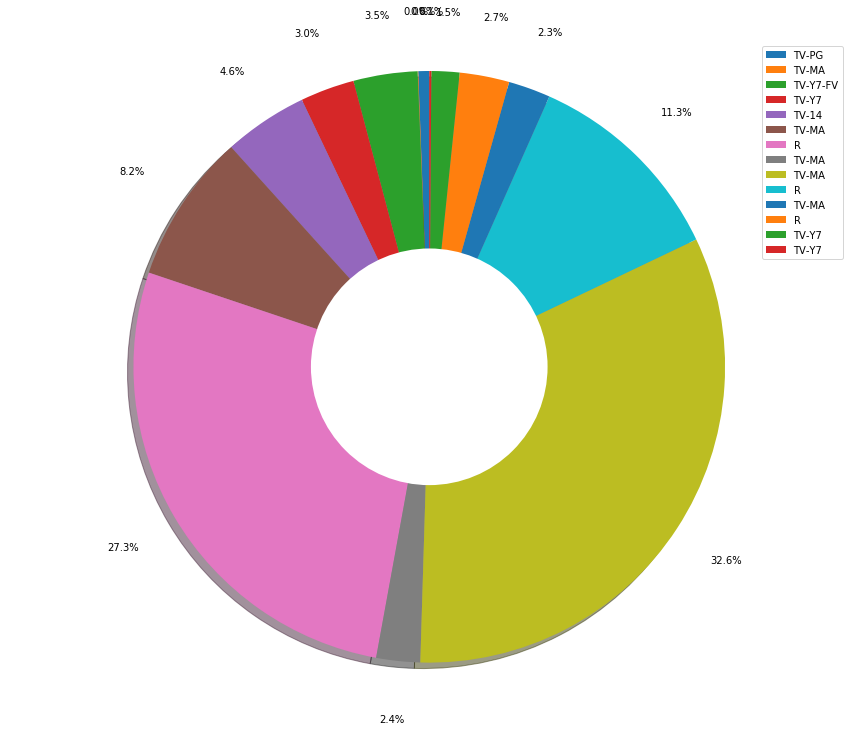

In [15]:
#Checking most common TV-rating content available on Netflix
rat=data.groupby('rating')[['show_id']].count().reset_index()
plt.figure(figsize=(15,12))
plt.pie(rat['show_id'],autopct='%1.1f%%', startangle=90, pctdistance=1.2,shadow=True)
centre_circle = plt.Circle((0,0),0.4,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.legend(data['rating'])
plt.show()

In [16]:
#how many movies vs. how many tv shows are on netflix
netflix_shows=data[data['type']=='TV Show']

In [17]:
netflix_movies=data[data['type']=='Movie']

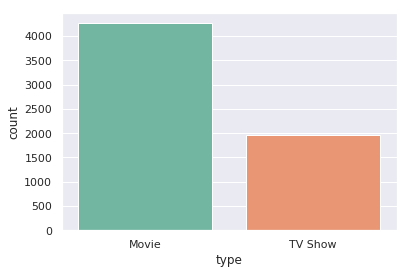

In [18]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=data, palette="Set2")

In [19]:
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']

0        90
1        94
4        99
6       110
7        60
9        90
10       78
11       95
12       58
13       62
14       65
15       61
16       65
17       58
18       60
19      135
20       98
21       96
22       79
23      113
24       90
25       80
27       77
29      112
30      106
31      106
32      102
33      114
35      125
36      142
       ... 
5542    111
5543     99
5544    110
5545     32
5546     94
5549     98
5550     74
5552    156
5553     88
5554     70
5555     88
5556     93
5557    143
5559     83
5560     90
5562    107
5563     93
5564     99
5568    134
5570     77
5571     78
5572    101
5573     53
5574     81
5575    106
5577     70
5578    102
5579     88
5580    109
6231     60
Name: duration, Length: 4265, dtype: int64

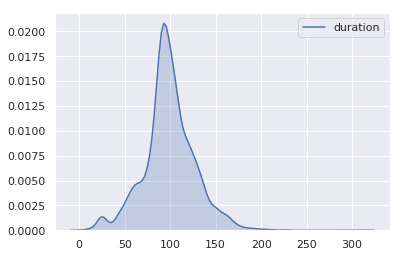

In [20]:
#Analysis on movie duration -- looks like most moves So, a good amount of movies on Netflix are among the duration of 75-120 mins. 
#It is acceptable considering the fact that a fair amount of the audience cannot watch a 3 hour movie in one sitting.
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_movies['duration'], shade=True)

In [21]:
#TV shows with the longest number of seasons. Greys Anatomy doesn't surprise me, I LOVE that show!!
features=['title','duration']
durations= netflix_shows[features]

durations['no_of_seasons']=durations['duration'].str.replace(' Season','')

#durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')

In [22]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

In [23]:
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)

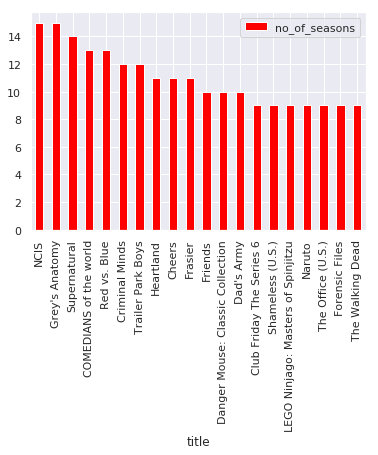

In [24]:
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='red')

In [25]:
!pip install canvas

In [26]:
#lowest number of seasons
bottom=top.sort_values(by='no_of_seasons')
bottom=bottom[20:50]

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'No of seasons']),
                 cells=dict(values=[bottom['title'],bottom['no_of_seasons']],fill_color='lavender'))
                     ])
fig.show

<bound method BaseFigure.show of Figure({
    'data': [{'cells': {'fill': {'color': 'lavender'},
                        'values': [['Dragons: Rescue Riders', 'Skylines', 'The
                                   Politician', 'The Inmate', 'Team Kaylie', 'Pawn
                                   Stars', 'Surviving R. Kelly', 'Lovesick', 'Fire
                                   Chasers', 'Apaches', 'BONDING', 'The Good Cop',
                                   'Criminal: France', 'Criminal: Germany',
                                   'Criminal: Spain', 'Criminal: UK', "Inside
                                   Bill's Brain: Decoding Bill Gates", 'The Hockey
                                   Girls', 'Two Sentence Horror Stories', 'Mobile
                                   Suit Gundam UC', 'Monkey Twins', 'DRAGON PILOT:
                                   Hisone & Masotan', "Chef's Table: France",
                                   'Transformers: Rescue Bots', 'Manhunt', 'When
              

In [27]:
#oldest tv shows on netflix 
us_series_data=netflix_shows[netflix_shows['country']=='United States']

In [28]:
oldest_us_series=us_series_data.sort_values(by='release_year')[0:20]

In [29]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year']),
                 cells=dict(values=[oldest_us_series['title'],oldest_us_series['release_year']]))
                     ])
fig.show

<bound method BaseFigure.show of Figure({
    'data': [{'cells': {'values': [['Pioneers of African-American Cinema', 'The
                                   Twilight Zone (Original Series)', 'The Andy
                                   Griffith Show', 'Star Trek', 'Highway to
                                   Heaven', 'High Risk', 'Twin Peaks', 'Ken Burns:
                                   The Civil War', "Pee-wee's Playhouse", 'Cheers',
                                   'Star Trek: The Next Generation', 'V.R.
                                   Troopers', 'Ken Burns: The West', 'Star Trek:
                                   Deep Space Nine', 'Mystery Science Theater
                                   3000', 'Star Trek: Voyager', 'Power Rangers Time
                                   Force', 'Behind Enemy Lines', 'Friends',
                                   'Frasier'], [1946, 1963, 1967, 1968, 1988, 1988,
                                   1990, 1990, 1990, 1992, 1993, 1995, 1996, 1

In [30]:
#Newst shows on netflix 
newest_us_series=us_series_data.sort_values(by='release_year', ascending=False)[0:50]

In [31]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year']),
                 cells=dict(values=[newest_us_series['title'],newest_us_series['release_year']]))
                     ])
fig.show

<bound method BaseFigure.show of Figure({
    'data': [{'cells': {'values': [['Killer Inside: The Mind of Aaron Hernandez',
                                   'Messiah', 'Medical Police', 'Cheer', 'Go! Go!
                                   Cory Carson', 'AJ and the Queen', 'Kipo and the
                                   Age of Wonderbeasts', 'Sex, Explained', 'The
                                   Society', 'Super Monsters Monster Pets', 'Tales
                                   of the City', 'Madam Secretary', 'Malibu Rescue:
                                   The Series', 'Exhibit A', 'Jane The Virgin',
                                   'Documentary Now!', 'Mr. Iglesias', 'Atypical',
                                   'Awake: The Million Dollar Game', 'Trinkets',
                                   'In The Dark', 'Designated Survivor', 'The Last
                                   Czars', 'Twelve Forever', 'Diagnosis',
                                   'Dynasty', 'The Boulet Broth

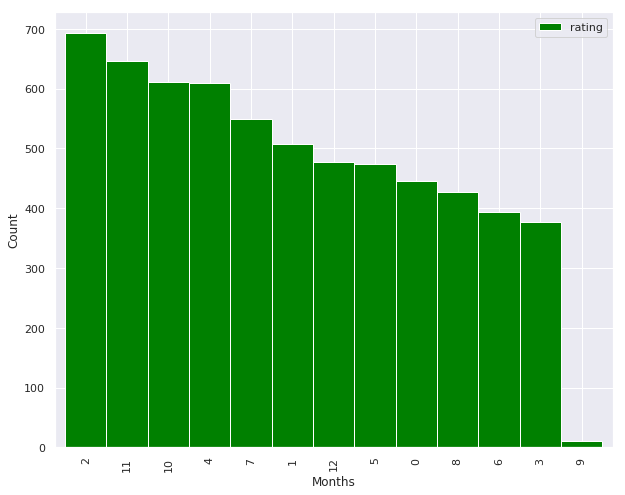

In [32]:
#Checking the month in which most content is added.

data['date']=pd.to_datetime(data['date_added'])
data['month']=data['date'].dt.strftime('%b')
data.groupby('month')[['rating']].count().reset_index().sort_values(by='rating',ascending=False).plot(kind='bar',\
                                                                               width=1,color='green',figsize=(10,8))
plt.xlabel("Months")
plt.ylabel("Count")
plt.show()

In [33]:
##The below cells begin anaysis on movie recommendation algorithm##
##We are here trying to build content based recommender system##

In [34]:
!pip install rake_nltk
from sklearn.metrics.pairwise import cosine_similarity #t features various algorithms like support vector machine, random forests, and k-neighbours, 
#and it also supports Python numerical and scientific libraries like NumPy and SciPy 
from sklearn.feature_extraction.text import CountVectorizer
from rake_nltk import Rake

In [35]:
#here I created a new dataset that will only include the title, director, cast, move/show type and description
new_df = data[['title','director','cast','listed_in','description']]
new_df.head()

,title,director,cast,listed_in,description
0,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Jandino: Whatever it Takes,NaN,Jandino Asporaat,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",Kids' TV,"With the help of three human allies, the Autob..."
3,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",Kids' TV,When a prison ship crash unleashes hundreds of...
4,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",Comedies,When nerdy high schooler Dani finally attracts...


In [36]:
##data mining for director, cleaning missing and updating data type
new_df['director']=new_df['director'].fillna(' ')
new_df['director']=new_df['director'].astype('str')

In [37]:
##data mining for cast, cleaning missing and updating data type
new_df['cast']=new_df['cast'].fillna(' ')
new_df['cast']=new_df['cast'].astype('str')

In [38]:
##created a bag_of_word column to join specific features movie/show with an individual movie title
##also, replacing white space strings with value for normalization
new_df['bag_of_word']= ''
for index,row in new_df.iterrows():
    plot = row['description']
    r = Rake()
    r.extract_keywords_from_text(plot)
    keyword_score = r.get_word_degrees()
    g = ''.join(row['listed_in'].split(',')).lower()
    d = ''.join(row['director'].replace(' ','').split(',')).lower()
    a = ' '.join(row['cast'].replace(' ','').split(',')).lower()
    k = ' '.join(list(keyword_score.keys()))
    row['bag_of_word'] = g + ' ' + ' ' + d + ' ' + a + ' ' + k

mydf = new_df[['title','bag_of_word']]
mydf.head()

,title,bag_of_word
0,Norm of the North: King Sized Adventure,children & family movies comedies richardfinn...
1,Jandino: Whatever it Takes,stand-up comedy jandinoasporaat raising kids...
2,Transformers Prime,kids' tv petercullen sumaleemontano frankwel...
3,Transformers: Robots in Disguise,kids' tv willfriedle darrencriss constancezi...
4,#realityhigh,comedies fernandolebrija nestacooper katewals...


In [39]:
## CountVectorizer will Convert a collection of text documents to a matrix of token counts
c = CountVectorizer()
count_mat = c.fit_transform(mydf['bag_of_word']) ## the fit_transform will learn the vocabulary dictionary and return term-document matrix.
cosine_sim = cosine_similarity(count_mat,count_mat)
print(cosine_sim)

[[1.         0.         0.         ... 0.0942809  0.03086067 0.03390318]
 [0.         1.         0.04472136 ... 0.         0.         0.        ]
 [0.         0.04472136 1.         ... 0.         0.10141851 0.07427814]
 ...
 [0.0942809  0.         0.         ... 1.         0.         0.        ]
 [0.03086067 0.         0.10141851 ... 0.         1.         0.21971769]
 [0.03390318 0.         0.07427814 ... 0.         0.21971769 1.        ]]


In [40]:
##put movie titles in indices to pull from a common starting point in order to compare variables to find movies with similar features
indices = pd.Series(mydf['title'])
##begining the required code to recommend movies based on all of above code
def recommend_movie(name):
    movie=[]
    idx = indices[indices == name].index[0]
    sort_index = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10 = sort_index.iloc[1:11]
    for i in top_10.index:
        movie.append(indices[i])
    return movie

In [41]:
recommend_movie('Transformers Prime')

['Transformers: Robots in Disguise',
 'You vs. Wild',
 'All Hail King Julien: Exiled',
 'We Bare Bears',
 'Mutant Busters',
 '3Below: Tales of Arcadia',
 'Miniforce X',
 'Kipo and the Age of Wonderbeasts',
 "Pee-wee's Playhouse",
 'Space Jungle']

In [42]:
##Transformers Prime is listed as TV-Y7-FV Kids' TV 
data[data['title'] == "We Bare Bears"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,month
70,80116921,TV Show,We Bare Bears,NaN,"Eric Edelstein, Demetri Martin, Bobby Moynihan",United States,"September 30, 2018",2017,TV-Y7,1 Season,"Kids' TV, TV Comedies","Grizzly, Panda and Ice Bear are three adopted ...",2018-09-30,Sep


In [43]:
recommend_movie('Oh! Baby (Malayalam)')

['Oh! Baby (Tamil)',
 'Oh! Baby (Malayalam)',
 'Theeya Velai Seyyanum Kumaru',
 'Hikaru Utada Laughter in the Dark Tour 2018',
 'Mumbai Matinee',
 'Haani',
 'Salaakhen',
 'Alejandro Sanz: What I Was Is What I Am',
 'Settai',
 'Mumbai Delhi Mumbai']

In [44]:
#Oh Baby Maylalam is listed as TV-14 rating
data[data['title'] == "Alejandro Sanz: What I Was Is What I Am"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,month
4940,80202810,Movie,Alejandro Sanz: What I Was Is What I Am,"Gervasio Iglesias, Alexis Morante",Alejandro Sanz,Spain,"August 18, 2018",2018,TV-14,102 min,"Documentaries, International Movies, Music & M...",A retrospective look at the life and career of...,2018-08-18,Aug


In [45]:
recommend_movie('Naruto Shippuden : Blood Prison')

['Naruto Shippuden: The Movie',
 'Naruto Shippûden the Movie: Bonds',
 'Naruto',
 'Naruto Shippuden: The Movie: The Lost Tower',
 'Naruto the Movie 3: Guardians of the Crescent Moon Kingdom',
 'Naruto Shippûden the Movie: The Will of Fire',
 'Naruto the Movie 2: Legend of the Stone of Gelel',
 'Naruto the Movie: Ninja Clash in the Land of Snow',
 'InuYasha the Movie: Affections Touching Across Time',
 'Berserk: The Golden Age Arc I - The Egg of the King']

In [46]:
recommend_movie('Main Hoon Na')

['Happy New Year',
 'Tezz',
 'Dilwale',
 'Hera Pheri',
 'Valor',
 'Sarkar',
 'Sarkar',
 "You Don't Mess with the Zohan",
 'Sniper: Special Ops',
 'CIA: Comrade in America']

In [47]:
recommend_movie ('Teen Aur Aadha') #rated mature

['Pihu',
 'Kia and Cosmos',
 'Noblemen',
 'Amateur',
 'Bhouri',
 'Dukhtar',
 'Blue Jay',
 'Oh My Ghost 4',
 'Shéhérazade',
 'Romina']

In [48]:
#Teen Aur Aadha is listed as mature rating
data[data['title'] == "Shéhérazade"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,month
1791,81012340,Movie,Shéhérazade,Jean-Bernard Marlin,"Dylan Robert, Kenza Fortas, Idir Azougli, Lisa...",France,"May 11, 2019",2019,TV-MA,111 min,"Dramas, Independent Movies, International Movies","Fresh out of juvenile detention in Marseille, ...",2019-05-11,May


In [49]:
recommend_movie ('Zoo')

['Haraamkhor',
 'Beyond the Clouds',
 'Divines',
 'Pihu',
 'Layer Cake',
 'Kalki',
 'Ludo',
 'INDIA',
 'Bulbul Can Sing',
 'Invisible']

In [50]:
##zoo is listed as TV-MA while Pihu is listed as TV-14
data[data['title'] == "Pihu"]
#for context TV-14: Parents strongly cautioned. This program contains some material that many parents would find unsuitable 
#for children under 14 years of age. TV-MA: Mature audience only. 
#This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,month
2637,81113927,Movie,Pihu,Vinod Kapri,Pihu Myra Vishwakarma,India,"June 15, 2019",2018,TV-14,90 min,"Dramas, Independent Movies, International Movies",A two-year-old must fend for herself when her ...,2019-06-15,Jun


In [51]:
mydf

,title,bag_of_word
0,Norm of the North: King Sized Adventure,children & family movies comedies richardfinn...
1,Jandino: Whatever it Takes,stand-up comedy jandinoasporaat raising kids...
2,Transformers Prime,kids' tv petercullen sumaleemontano frankwel...
3,Transformers: Robots in Disguise,kids' tv willfriedle darrencriss constancezi...
4,#realityhigh,comedies fernandolebrija nestacooper katewals...
5,Apaches,crime tv shows international tv shows spanish-...
6,Automata,international movies sci-fi & fantasy thriller...
7,Fabrizio Copano: Solo pienso en mi,stand-up comedy rodrigotorofranciscoschultz f...
8,Fire Chasers,docuseries science & nature tv california p...
9,Good People,action & adventure thrillers henrikrubengenz ...


In [52]:
recommend_movie('Red vs. Blue')

['The Umbrella Academy',
 'Disenchantment',
 "Oh No! It's an Alien Invasion",
 'Lost in Space',
 'Black Lightning',
 'Ice Fantasy',
 'Maharakshak: Aryan',
 'The Land of Hypocrisy',
 'Colony',
 'Battlefish']

In [53]:
recommend_movie('Crazy Ex-Girlfriend')

['Dancing Angels',
 'Ex-Boyfriend',
 'Qué pena tu serie',
 'Something in the Rain',
 'Khan: No. 1 Crime Hunter',
 'Twice Upon A Time',
 'In Between',
 'What Is Love?',
 'Refresh Man',
 'Billy on the Street']

In [54]:
recommend_movie('Friends')

['Episodes',
 "Dad's Army",
 'Melodies of Life - Born This Way',
 'Little Things',
 'O-Negative, Love Can’t Be Designed',
 "Pee-wee's Playhouse",
 'Still Game',
 'Lunatics',
 'Toast of London',
 'Dancing Angels']

In [55]:
#here I created a new dataset that will only include the title, director, cast, move/show type and description
new_df2 = data[['title','description','listed_in','rating']]
new_df2.head()

,title,description,listed_in,rating
0,Norm of the North: King Sized Adventure,Before planning an awesome wedding for his gra...,"Children & Family Movies, Comedies",TV-PG
1,Jandino: Whatever it Takes,Jandino Asporaat riffs on the challenges of ra...,Stand-Up Comedy,TV-MA
2,Transformers Prime,"With the help of three human allies, the Autob...",Kids' TV,TV-Y7-FV
3,Transformers: Robots in Disguise,When a prison ship crash unleashes hundreds of...,Kids' TV,TV-Y7
4,#realityhigh,When nerdy high schooler Dani finally attracts...,Comedies,TV-14


In [56]:
!pip install rake-nltk
from rake_nltk import Rake
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [57]:
##data mining for director, cleaning missing and updating data type
new_df2['description']=new_df2['description'].fillna(' ')
new_df2['description']=new_df2['description'].astype('str')

In [58]:
new_df2['rating']=new_df2['rating'].fillna(' ')
new_df2['rating']=new_df2['rating'].astype('str')

In [59]:
##created a new bag_of_word column to join specific features movie/show with an individual movie title
##also, replacing white space strings with value for normalization
new_df2['bag_of_words']= ''
for index,row in new_df2.iterrows():
    plot = row['title']
    r = Rake()
    r.extract_keywords_from_text(plot)
    keyword_score = r.get_word_degrees()
    g = ''.join(row['listed_in'].split(',')).lower()
    d = ''.join(row['description'].replace(' ','').split(',')).lower()
    a = ' '.join(row['rating'].replace(' ','').split(',')).lower()
    k = ' '.join(list(keyword_score.keys()))
    row['bag_of_words'] = g + ' ' + ' ' + d + ' ' + a + ' ' + k

mydf2 = new_df2[['title','bag_of_words']]
mydf2.head()

,title,bag_of_words
0,Norm of the North: King Sized Adventure,children & family movies comedies beforeplann...
1,Jandino: Whatever it Takes,stand-up comedy jandinoasporaatriffsonthechal...
2,Transformers Prime,kids' tv withthehelpofthreehumanalliestheauto...
3,Transformers: Robots in Disguise,kids' tv whenaprisonshipcrashunleasheshundred...
4,#realityhigh,comedies whennerdyhighschoolerdanifinallyattr...


In [60]:
## CountVectorizer will Convert a collection of text documents to a matrix of token counts
c = CountVectorizer()
count_mat = c.fit_transform(mydf2['bag_of_words']) ## the fit_transform will learn the vocabulary dictionary and return term-document matrix.
cosine_sim = cosine_similarity(count_mat,count_mat)
print(cosine_sim)

[[1.         0.08703883 0.18257419 ... 0.10206207 0.26352314 0.28867513]
 [0.08703883 1.         0.19069252 ... 0.         0.27524094 0.22613351]
 [0.18257419 0.19069252 1.         ... 0.         0.46188022 0.47434165]
 ...
 [0.10206207 0.         0.         ... 1.         0.         0.08838835]
 [0.26352314 0.27524094 0.46188022 ... 0.         1.         0.5933661 ]
 [0.28867513 0.22613351 0.47434165 ... 0.08838835 0.5933661  1.        ]]


In [61]:
##put movie titles in indices to pull from a common starting point in order to compare variables to find movies with similar features
indices = pd.Series(mydf2['title'])
##begining the required code to recommend movies based on all of above code
def recommend2_movie(name):
    movie=[]
    idx = indices[indices == name].index[0]
    sort_index = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10 = sort_index.iloc[1:11]
    for i in top_10.index:
        movie.append(indices[i])
    return movie

In [62]:
recommend_movie ('Zoo')

['I Am',
 'The spiral',
 'Sunrise',
 'Below Her Mouth',
 'Mater',
 'Fireflies',
 'Rukh',
 'Pickpockets',
 'Joy',
 'Rivaaz']

In [63]:
##zoo is listed as TV-MA 
data[data['title'] == "Mater"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,month
5104,80993656,Movie,Mater,Pablo D'Alo Abba,"Lautaro Perotti, Tamara Kiper, Inda Lavalle, M...",Argentina,"August 1, 2018",2017,TV-MA,80 min,"Dramas, Independent Movies, International Movies",A single man in his 30s overwhelmed by his dom...,2018-08-01,Aug


In [64]:
#install wordcloud for more visuals
!pip install wordcloud

In [65]:
#additional/misc visuals for final presentation

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [66]:
description_category = data[['listed_in','description']]
description_category['listed_in'] = description_category['listed_in'].apply(lambda x: x.split(', '))
description_category.head()

,listed_in,description
0,"[Children & Family Movies, Comedies]",Before planning an awesome wedding for his gra...
1,[Stand-Up Comedy],Jandino Asporaat riffs on the challenges of ra...
2,[Kids' TV],"With the help of three human allies, the Autob..."
3,[Kids' TV],When a prison ship crash unleashes hundreds of...
4,[Comedies],When nerdy high schooler Dani finally attracts...


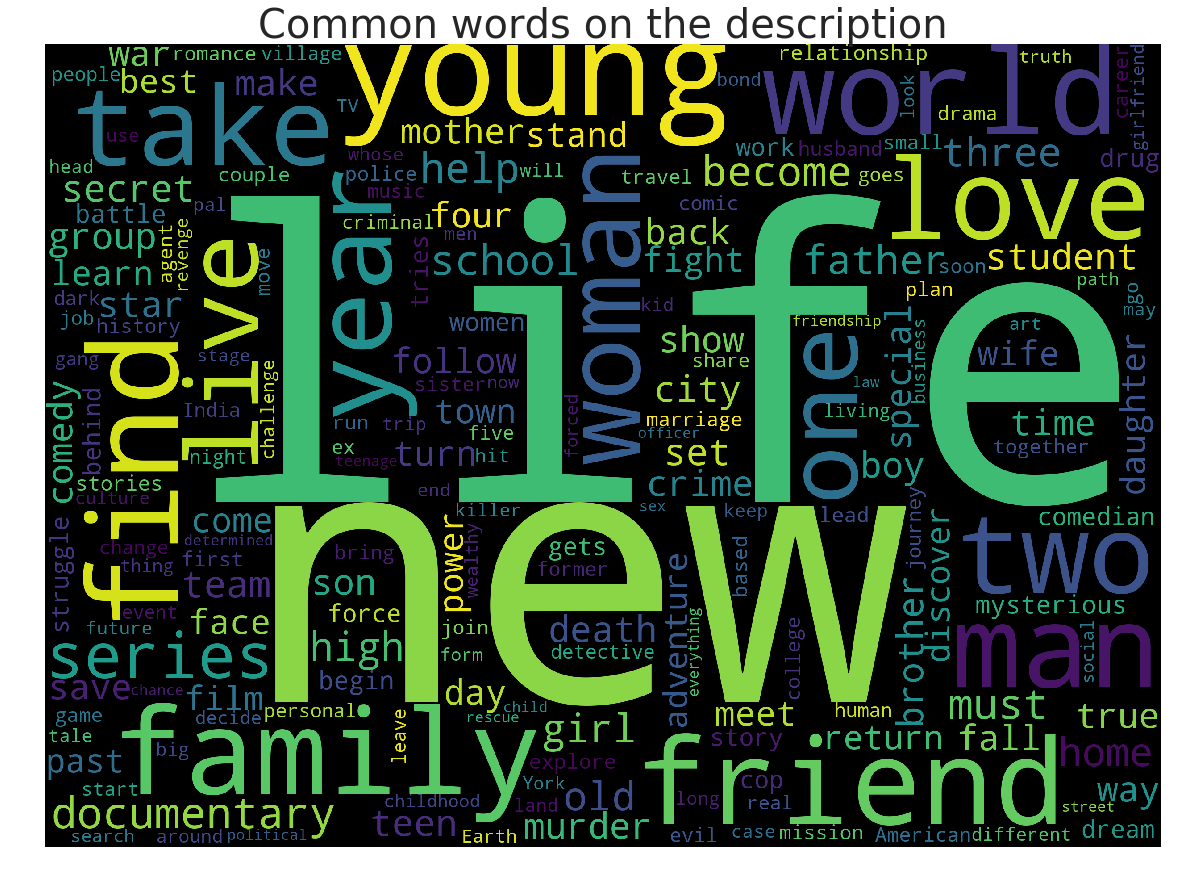

In [67]:
plt.figure(figsize=(20,15))
# clean
#subset = description_category[description_category.clean==True]
text = description_category.description.values
cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Common words on the description",fontsize=40)
plt.imshow(cloud)
# Same code can be used to generate wordclouds of other categories.

In [68]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,month
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019-09-09,Sep
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016-09-09,Sep
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018-09-08,Sep
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018-09-08,Sep
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017-09-08,Sep


In [69]:
data[["type", "title","country"]].head()

,type,title,country
0,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China"
1,Movie,Jandino: Whatever it Takes,United Kingdom
2,TV Show,Transformers Prime,United States
3,TV Show,Transformers: Robots in Disguise,United States
4,Movie,#realityhigh,United States


In [70]:
# Groupby by country
country = data.groupby("country")

# Summary statistic of all countries
data.describe().head()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000


In [71]:
?WordCloud

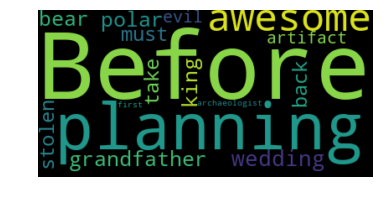

In [72]:
# Start with one review:
text = data.description[0]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=5000, max_words=10000).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

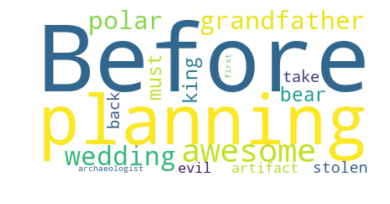

In [73]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=500, max_words=1000, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [74]:
#word cloud for move/show types
from collections import Counter
genres=list(netflix_shows['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

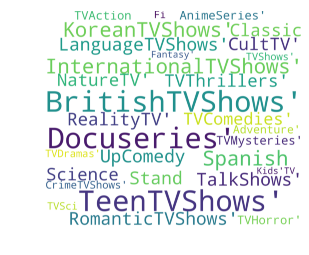

In [75]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = list(set(gen))

wordcloud = WordCloud(max_font_size=500, max_words=100,background_color="white",width=4500,
                          height=3800).generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [76]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # Alignments 

import seaborn as sns # theme & dataset
print(f"Matplotlib Version : {mpl.__version__}")
print(f"Seaborn Version : {sns.__version__}")

Matplotlib Version : 3.0.2
Seaborn Version : 0.9.0


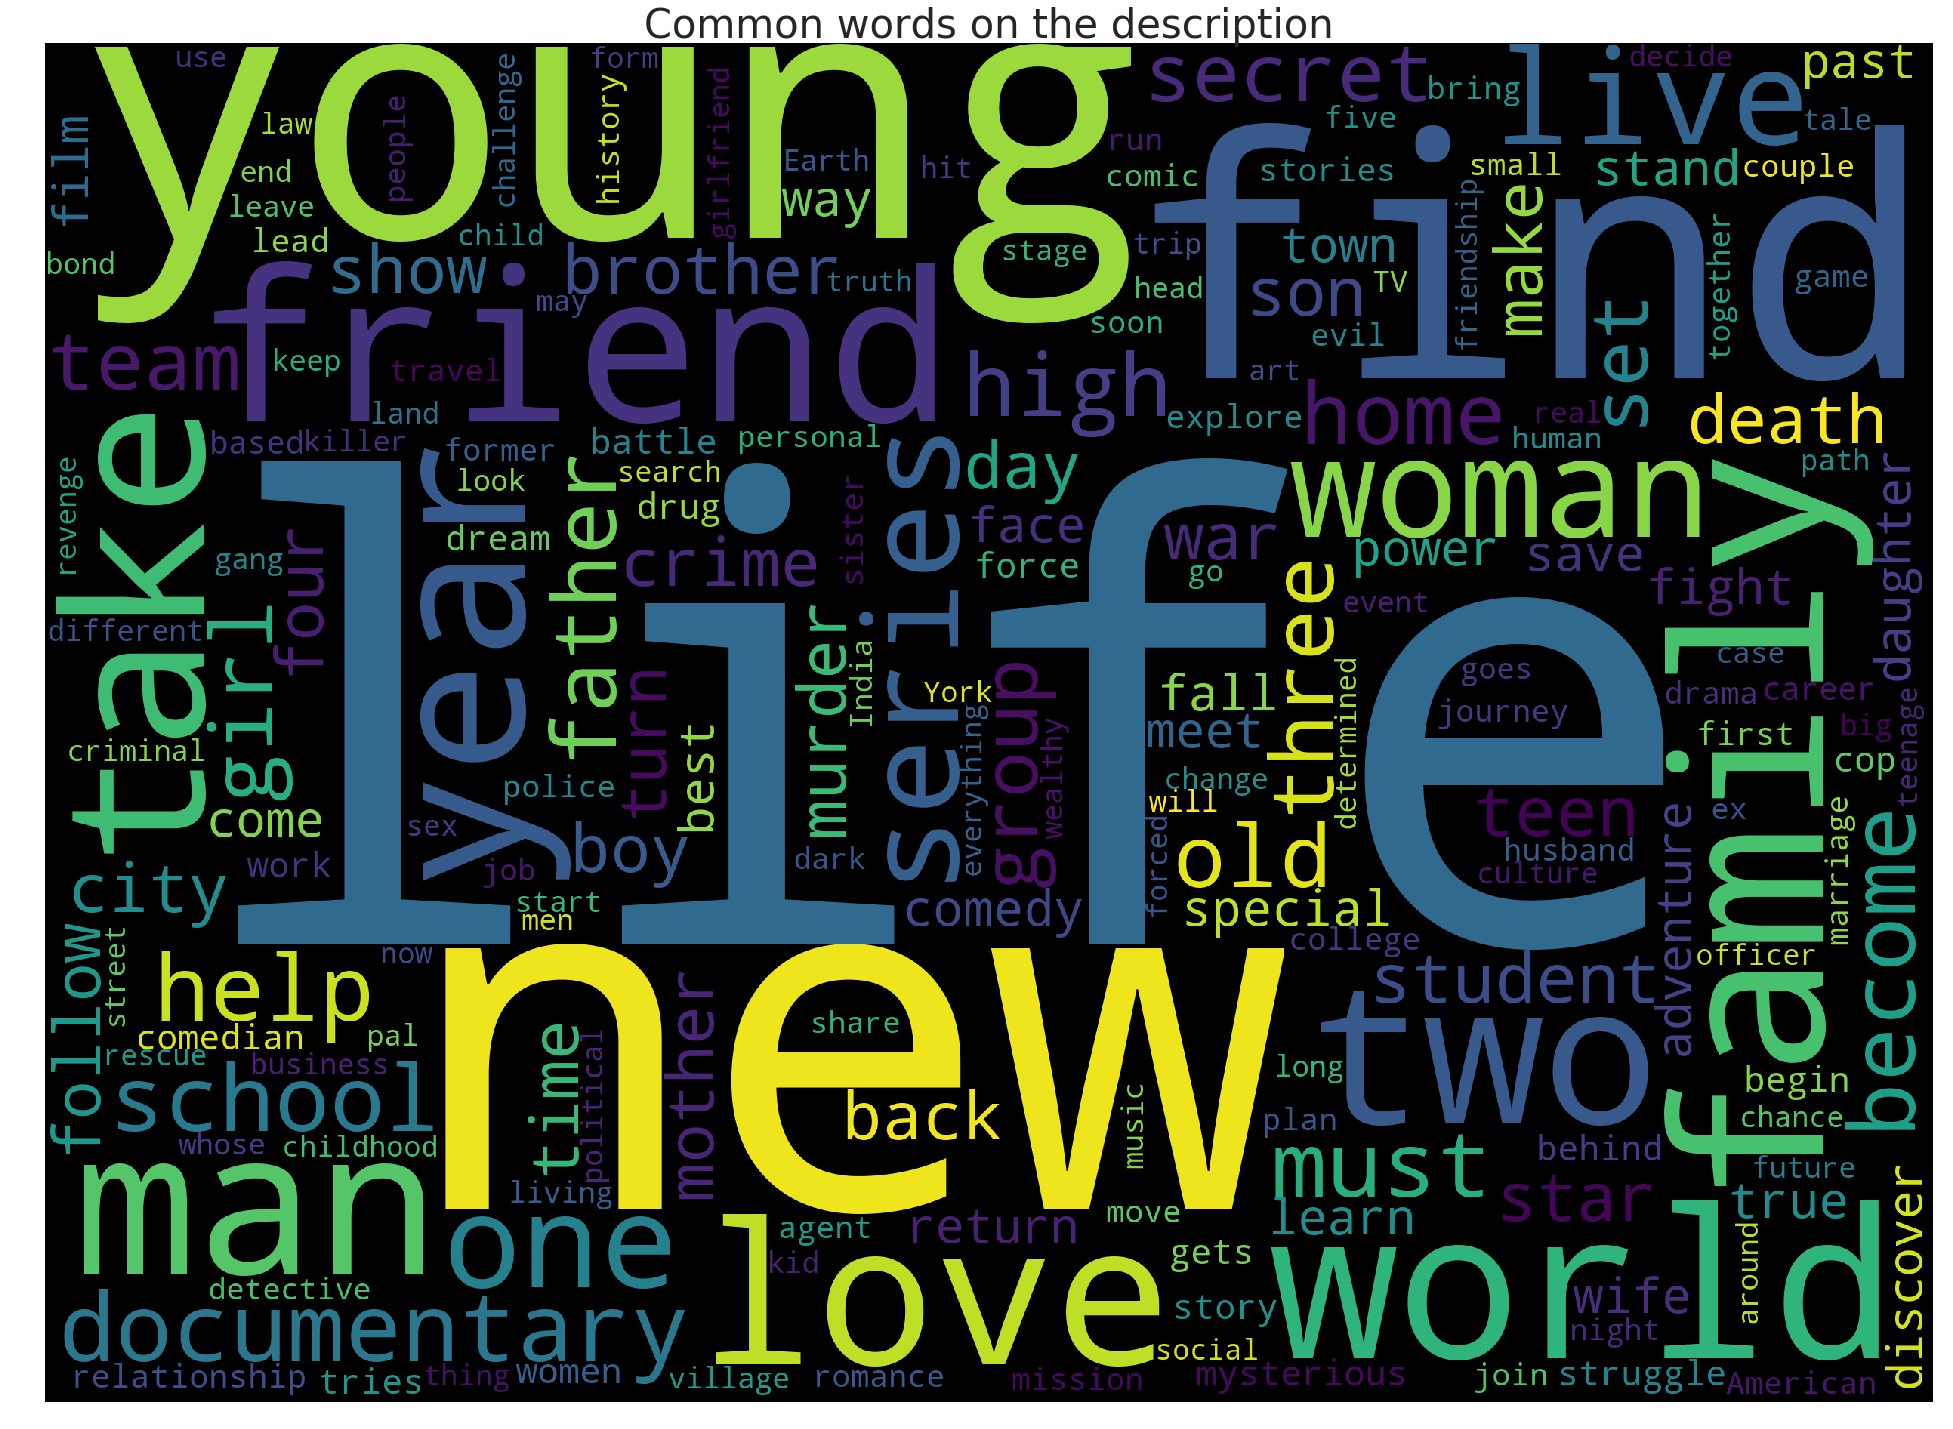

In [77]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))
# clean
#subset = description_category[description_category.clean==True]
text = description_category.description.values
cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Common words on the description",fontsize=40)
plt.imshow(cloud)
# Same code can be used to generate wordclouds of other categories.